In [57]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np

import simulation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simulation Algorithm

Rolling dice can be considered as uniform random procces. Every round we should simulate throws of 5 roll dices and then keep throwing next 2 times. Second and third throws should be without scored dices. Total round score is the sum of scored dices or after reformalation it can be calculated as multiplication of number of scored dices on round's number. To simulate the whole game we should repeat round simulation 6 times.

In [30]:
X = simulation.run(100_000)

In [31]:
x = pd.Series(X, name="Scores")

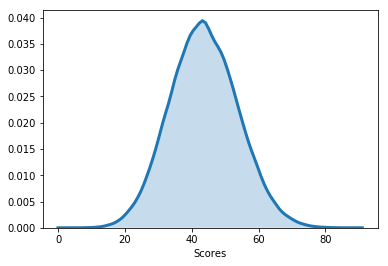

In [47]:
ax = sns.distplot(x, hist=False, kde=True, kde_kws={'linewidth': 3, 'shade': True});

## Estimate probability of bonus

In [39]:
counts = x.value_counts()

In [40]:
counts[counts.index >= 42]

43    4026
44    3975
42    3826
45    3787
46    3655
47    3492
48    3463
49    3323
50    3174
51    2942
52    2752
53    2520
54    2267
55    2059
56    1838
57    1606
58    1448
59    1281
60    1134
61     887
62     806
63     628
64     555
65     482
66     359
67     291
68     246
69     211
70     161
71     129
72      92
73      76
74      62
75      38
76      28
77      27
78      12
80      12
79      11
81       4
82       3
83       2
84       1
85       1
88       1
Name: Scores, dtype: int64

In [41]:
counts[counts.index >= 42].sum()

57693

In [50]:
p = counts[counts.index >= 42].sum() / 100_000
p

0.57693

## How many simulations

How many simulations are needed to be `95%` certain that there is an error of at most `0.01` in the estimated probability can be obtained from the margin of error formula:

![ME](img/ME.png)

In [67]:
ME = 0.01
z = 1.96

In [69]:
s = np.std(x)
s

10.151937635427043

In [70]:
n = ( (z * s / ME))**2
n

3959223.559142299